<h1>Futtatás valódi kvantumszámítógépen</h1>

In [7]:
# Importálja az áramkör elkészítéséhez szükséges könyvtárakat
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

# Betölti az IBM fiókot
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

ibmqfactory.load_account:WARNING:2023-01-01 16:58:08,484: Credentials are already in use. The existing account in the session will be replaced.


<h2>Az áramkör elkészítése</h2>

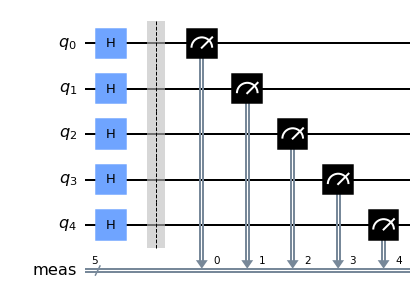

In [8]:
qc = QuantumCircuit(5)

for i in range(5):
    qc.h(i)

qc.measure_all()

qc.draw()

<h2>Futtatás szimulátoron</h2>

{'10000': 56, '10001': 50, '11000': 67, '11101': 64, '01100': 67, '01000': 70, '11010': 73, '01001': 67, '00101': 69, '01111': 52, '10010': 65, '10101': 76, '00110': 65, '00001': 65, '11100': 60, '10011': 76, '00010': 46, '11001': 60, '00000': 66, '00111': 70, '00011': 63, '10111': 69, '10100': 56, '00100': 61, '11111': 79, '11011': 61, '01101': 63, '10110': 49, '01110': 66, '01010': 71, '01011': 72, '11110': 54}


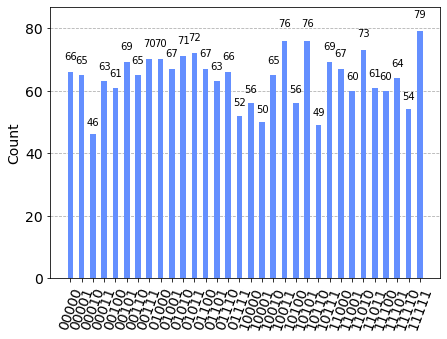

In [9]:
job = execute(qc, Aer.get_backend("aer_simulator"), shots=2048)
counts = job.result().get_counts(qc)
print(counts)
plot_histogram(counts)

<h2>Futtatás valódi kvantumszámítógépen</h2>

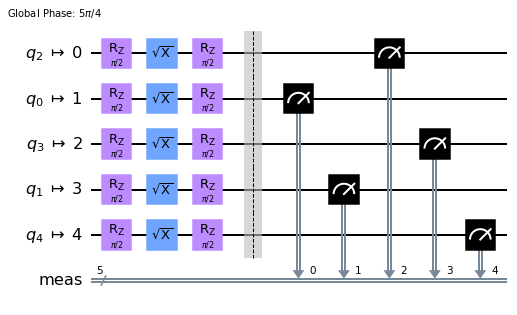

Job Status: job has successfully run


In [10]:
# Keres egy szabad hardwaret és lefuttatja az áramkört

N = 5 # A kvantumbitek száma

backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= N and
                                   not b.configuration().simulator and b.status().operational==True)) # Keres egy szabad hardwaret
t_qc = transpile(qc, backend, optimization_level=3) # Előkészíti az áramkört

display(t_qc.draw()) # Kirajzolja az optimalizált áramkört

job = backend.run(t_qc) # Lefuttatja valódi kvantumszámíytógépen
job_monitor(job)  # Kiírja a futás állapotát

{'00000': 183, '00001': 172, '10000': 156, '10001': 144, '10010': 117, '10011': 116, '10100': 150, '10101': 119, '10110': 112, '10111': 105, '11000': 147, '11001': 107, '11010': 100, '11011': 87, '11100': 119, '11101': 121, '11110': 96, '11111': 89, '00010': 128, '00011': 127, '00100': 182, '00101': 164, '00110': 125, '00111': 105, '01000': 152, '01001': 106, '01010': 99, '01011': 102, '01100': 157, '01101': 113, '01110': 111, '01111': 89}


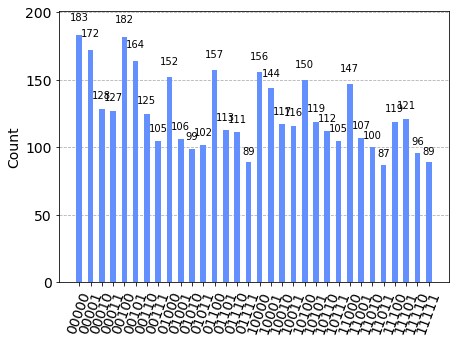

In [11]:
# Megjeleníti a futtatás eredményét
exp_result = job.result()
exp_counts = exp_result.get_counts(qc)
print(exp_counts)
plot_histogram(exp_counts)